In [1]:
import sys
sys.path.append('/proj/leousers/users/speech/syk2145/scripts')

## Preprocessing data

### directely from pretrained htdemucs_ft model

In [ ]:
!conda activate nrser_v2

In [ ]:
%pip install torch torchaudio demucs tqdm soundfile

```sh
python preprocessing/demucs_speech_speration.py --input /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Audios --output /proj/speech/users/syk2145/nrser_v2/data/MSP-PODCAST-cleaned_demucs
```

In [6]:
from audio_utils import render_audio

render_audio("/proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Audios/MSP-PODCAST_2420_0683.wav")
render_audio("/proj/speech/users/syk2145/nrser_v2/data/MSP-PODCAST-cleaned_demucs/MSP-PODCAST_2420_0683.wav")
render_audio("/proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Audios_en/MSP-PODCAST_2420_0683.wav")
tmp = render_audio("/proj/speech/users/syk2145/data/Audios_en_sgmse/clean/MSP-PODCAST_2420_0683.wav")

## prepare dev dataset

In [3]:
from utils.os.get_file_sample import get_file_sample

val_list = get_file_sample("/proj/speech/users/syk2145/data/Audios_en_sgmse/clean")
val_list[0]

Found 151654 files in /proj/speech/users/syk2145/data/Audios_en_sgmse/clean
Selected 7582 files (5%)


'/proj/speech/users/syk2145/data/Audios_en_sgmse/clean/MSP-PODCAST_4134_0252.wav'

In [ ]:
from utils.os.create_symlinks import create_symlinks
create_symlinks(val_list, "/proj/speech/users/syk2145/data/samples/Audios", is_directory=False)

In [ ]:
create_symlinks("/proj/speech/projects/noise_robustness/Audioset/Audioset-train-20", "/proj/speech/users/syk2145/data/samples/Audioset", is_directory=True)

### filter out invalide audio

In [ ]:
from utils.audio.preprocess_audio_files import preprocess_audio_files
valid_files, invalied_filed = preprocess_audio_files("/proj/speech/users/syk2145/data/samples/Audios") 

Validating audio files: 100%|██████████| 7582/7582 [00:18<00:00, 411.05it/s]

Found 7582 valid files and 0 invalid files


In [9]:
valid_files, invalied_filed = preprocess_audio_files("/proj/speech/users/syk2145/data/samples/Audioset") 

Validating audio files:  21%|██        | 820/3913 [00:01<00:06, 479.47it/s]

Invalid audio in: /proj/speech/users/syk2145/data/samples/Audioset/UMfMC4FMZGc.wav


Validating audio files:  58%|█████▊    | 2264/3913 [00:05<00:03, 509.42it/s]

Invalid audio in: /proj/speech/users/syk2145/data/samples/Audioset/YjmRDFlEql4.wav


Validating audio files: 100%|██████████| 3913/3913 [00:09<00:00, 399.19it/s]

Found 3911 valid files and 2 invalid files


In [10]:
!mv /proj/speech/users/syk2145/data/samples/Audioset/UMfMC4FMZGc.wav ~/.Trash/
!mv /proj/speech/users/syk2145/data/samples/Audioset/YjmRDFlEql4.wav ~/.Trash/

In [ ]:
valid_files, invalied_filed = preprocess_audio_files("/proj/speech/users/syk2145/data/samples/Audioset") 

Validating audio files: 100%|██████████| 3911/3911 [00:03<00:00, 1170.14it/s]

Found 3911 valid files and 0 invalid files


In [3]:
from utils.audio.preprocess_audio_files import preprocess_audio_files
valid_files, invalied_filed = preprocess_audio_files("/proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Audios") 

Validating audio files: 100%|██████████| 151654/151654 [24:13<00:00, 104.32it/s]

Found 151654 valid files and 0 invalid files


In [4]:
valid_files, invalied_filed = preprocess_audio_files("/proj/speech/users/syk2145/data/Audios_en_sgmse/clean") 

Validating audio files: 100%|██████████| 151654/151654 [1:03:58<00:00, 39.51it/s] 

Found 151654 valid files and 0 invalid files


## process label

In [4]:
!python labels/processed/process_csv_label.py --input /proj/speech/users/syk2145/data/labels/MSP-Podcast/labels_consensus.csv --output labels/processed/labels_consensus_processed.csv

Total rows in input file: 149307
Found 29923 rows with 'X' and 3310 rows with 'O' in EmoClass
Filtered out 33233 rows
Saved 116074 rows to labels/processed/labels_consensus_processed.csv


In [11]:
# process text label to compatible with baseline model inference
!python labels/processed/process_txt_label.py --input labels/msp1_11-test2-clean-noisy.txt --output labels/processed/msp1_11-test2-clean-noisy_processed.txt

Processing complete.
Kept 34233 valid lines.
Filtered out 10212 lines with X or O labels.
Results saved to labels/processed/msp1_11-test2-clean-noisy_processed.txt


## test 

In [ ]:
!python train.py --config config/dev.yaml --device cuda:1

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: Traceback (most recent call last):
  File "/proj/leousers/users/speech/syk2145/nrse/train.py", line 314, in <module>
    main()
  File "/proj/leousers/users/speech/syk2145/nrse/train.py", line 236, in main
    wandb.init(project="noise-robust-speech-embeddings", config=config)
  File "/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/wandb/sdk/wandb_init.py", line 1478, in init
    wi.maybe_login(init_settings)
  File "/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/wandb/sdk/wandb_init.py", line 177, in maybe_login
    wandb_login._login(
  File "/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/wandb/sdk/wandb_login.py", line 305, in _login
    key, key_status = wlogin.prompt_api_key()
  File "/home

### encoder

In [10]:
!python src/models/encoder.py

Embeddings shape: torch.Size([2, 768])
Embeddings are numerically stable.
No infinite values in embeddings.


### config

In [36]:
from config import load_config 
config = load_config("/proj/speech/users/syk2145/nrse/config/dev.yaml")
epoch = 3
print(config['logging']['metric_logging_interval'], config['logging']['visualization_interval'])

print((epoch + 1) % config['logging']['metric_logging_interval'] == 1)
print((epoch + 1) % config['logging']['visualization_interval'] == 1)

1 1
False
False


### evaluation

In [ ]:
from src.models.byol import BYOLSpeechModel
from config import load_config 
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

config = load_config("/proj/speech/users/syk2145/nrse/config/dev.yaml")
checkpoint = torch.load("/proj/speech/users/syk2145/nrse/checkpoints/best_model.pt", map_location=device)
model = BYOLSpeechModel(config).to(device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [ ]:
from transformers import AutoFeatureExtractor
from src.models.encoder import WavLMEncoder
from data.noisy_speech_dataset import create_dataloader

feature_extractor = AutoFeatureExtractor.from_pretrained(config['model']['name'])
dataloader = create_dataloader(config, feature_extractor)

Found 7582 clean files and 3911 noise files.


: 

In [40]:
from evaluate import evaluate_embedding_similarity

similarities = evaluate_embedding_similarity(model, dataloader, device)

In [41]:
similarities

{0: 0.8184624527181897,
 5: 0.9240977281615848,
 10: 0.9537629164182223,
 15: 0.975070940123664,
 20: 0.9920731782913208}

In [ ]:
import importlib
import evaluate_byol
importlib.reload(evaluate_byol)

evaluate_byol.visualize_embeddings(model, dataloader, device, "/proj/speech/users/syk2145/nrse/output")

Visualization saved to /proj/speech/users/syk2145/nrse/output/tsne_embeddings.png


### augrmentation

In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchaudio
import IPython.display as ipd
from tqdm.notebook import tqdm

# Assuming add_noise_to_speech is in a module you can import
from src.data.augment import add_noise_to_speech

def test_add_noise_to_speech(clean_audio_path, noise_audio_path, snr_values=[-10, -5, 0, 5, 10, 15, 20]):
    """
    Test the add_noise_to_speech function with different SNR values
    and visualize/play the results.
    
    Args:
        clean_audio_path: Path to clean speech file
        noise_audio_path: Path to noise file
        snr_values: List of SNR values to test
    """
    # Load audio files
    clean_speech, sr = torchaudio.load(clean_audio_path)
    noise, noise_sr = torchaudio.load(noise_audio_path)
    
    # Resample noise if needed
    if noise_sr != sr:
        noise = torchaudio.functional.resample(noise, noise_sr, sr)
    
    # Make sure both are mono
    if clean_speech.shape[0] > 1:
        clean_speech = torch.mean(clean_speech, dim=0, keepdim=True)
    if noise.shape[0] > 1:
        noise = torch.mean(noise, dim=0, keepdim=True)
    
    # Trim or pad noise to match speech length
    if noise.shape[1] > clean_speech.shape[1]:
        noise = noise[:, :clean_speech.shape[1]]
    elif noise.shape[1] < clean_speech.shape[1]:
        padding = clean_speech.shape[1] - noise.shape[1]
        noise = torch.nn.functional.pad(noise, (0, padding))
    
    # Normalize audio
    clean_speech = clean_speech / (torch.max(torch.abs(clean_speech)) + 1e-8)
    noise = noise / (torch.max(torch.abs(noise)) + 1e-8)
    
    # Create a figure for visualization
    plt.figure(figsize=(15, 10))
    
    # Plot original clean speech
    plt.subplot(len(snr_values) + 1, 1, 1)
    plt.plot(clean_speech[0].numpy())
    plt.title(f"Clean Speech")
    plt.ylim(-1.1, 1.1)
    
    # Test with different SNR values
    noisy_speeches = []
    
    for i, snr in enumerate(snr_values):
        # Add noise to speech
        noisy_speech = add_noise_to_speech(clean_speech, noise, snr)
        noisy_speeches.append(noisy_speech)
        
        # Calculate actual SNR achieved
        speech_power = torch.mean(clean_speech ** 2).item()
        noise_component = noisy_speech - clean_speech
        noise_power = torch.mean(noise_component ** 2).item()
        actual_snr = 10 * np.log10(speech_power / noise_power) if noise_power > 0 else float('inf')
        
        # Plot noisy speech
        plt.subplot(len(snr_values) + 1, 1, i + 2)
        plt.plot(noisy_speech[0].numpy())
        plt.title(f"Noisy Speech (Target SNR: {snr} dB, Actual SNR: {actual_snr:.2f} dB)")
        plt.ylim(-1.1, 1.1)
    
    plt.tight_layout()
    plt.show()
    
    # Play audio samples
    print("Clean Speech:")
    display(ipd.Audio(clean_speech[0].numpy(), rate=sr))
    
    for i, snr in enumerate(snr_values):
        print(f"Noisy Speech (SNR: {snr} dB):")
        display(ipd.Audio(noisy_speeches[i][0].numpy(), rate=sr))

# Example usage
# test_add_noise_to_speech('path/to/clean_speech.wav', 'path/to/noise.wav')

In [2]:
from utils.os.get_file_sample import get_file_sample
speech_list = get_file_sample("/proj/speech/users/syk2145/data/samples/Audios")
noisy_list = get_file_sample("/proj/speech/users/syk2145/data/samples/Audioset")

Found 7582 files in /proj/speech/users/syk2145/data/samples/Audios
Selected 379 files (5%)
Found 3911 files in /proj/speech/users/syk2145/data/samples/Audioset
Selected 195 files (5%)


In [3]:
from audio_utils import render_audio
render_audio(speech_list[1])

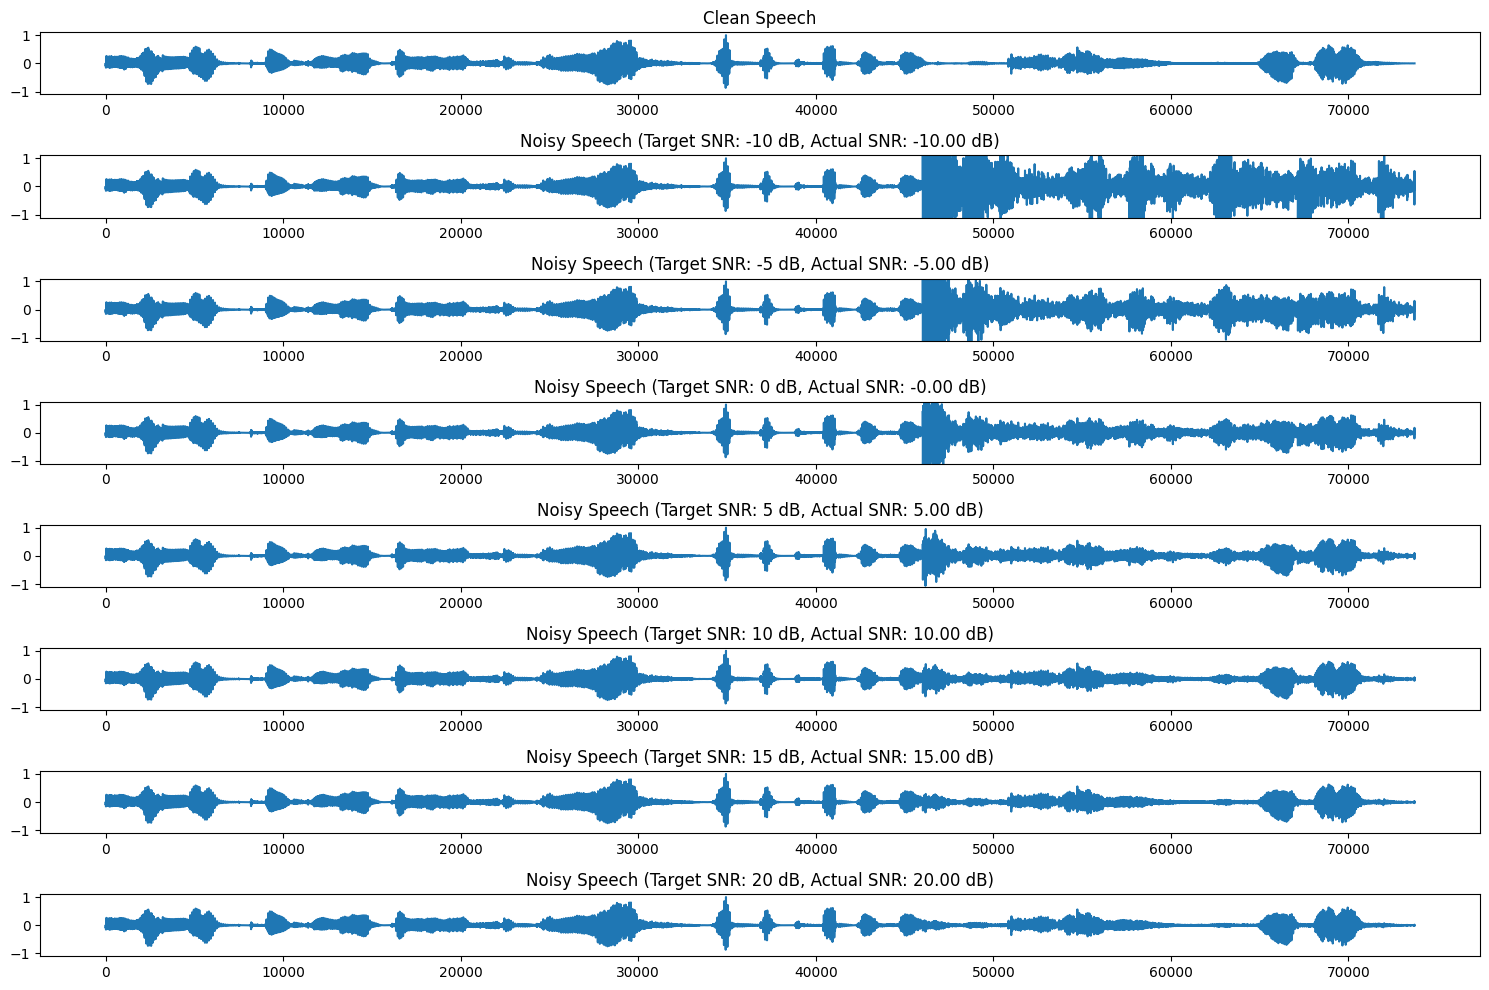

Clean Speech:


Noisy Speech (SNR: -10 dB):


Noisy Speech (SNR: -5 dB):


Noisy Speech (SNR: 0 dB):


Noisy Speech (SNR: 5 dB):


Noisy Speech (SNR: 10 dB):


Noisy Speech (SNR: 15 dB):


Noisy Speech (SNR: 20 dB):


In [11]:
test_add_noise_to_speech(speech_list[1], noisy_list[2], snr_values=[-10, -5, 0, 5, 10, 15, 20])

### test noisy file check

In [ ]:
from audio_utils import render_audio
# snr4 and snr8 noise inconsistance 
audio_dir = "/proj/speech/users/syk2145/data/Audios_noisy_test2"
msp_id="MSP-PODCAST_2061_0256"
noise_id="TEYK6ZUCB28"
render_audio(f"{audio_dir}/4/{msp_id}_snr4_{noise_id}.wav")
render_audio(f"{audio_dir}/8/{msp_id}_snr8_{noise_id}.wav")

In [8]:
audio_dir = "/proj/speech/users/syk2145/data/Audios_noisy_test2"
msp_id="MSP-PODCAST_2093_0863"
noise_id="54nmkqqkvCs"
render_audio(f"{audio_dir}/4/{msp_id}_snr4_{noise_id}.wav")
render_audio(f"{audio_dir}/8/{msp_id}_snr8_{noise_id}.wav")

In [14]:
# lower snr indicates higher noise
audio_dir = "/proj/speech/users/syk2145/data/Audios_noisy_test2"
msp_id="MSP-PODCAST_1811_0064"
noise_id="eWvOCr__m5o"
render_audio(f"{audio_dir}/4/{msp_id}_snr4_{noise_id}.wav")
render_audio(f"{audio_dir}/8/{msp_id}_snr8_{noise_id}.wav")

audio_dir = "/proj/speech/users/syk2145/data/Audios_noisy_train"
render_audio(f"{audio_dir}/2/MSP-PODCAST_2750_0179_snr2_T1ZXkqDLwrg.wav")
render_audio(f"{audio_dir}/10/MSP-PODCAST_3222_0478_snr10_T1ZXkqDLwrg.wav")

## benchmarking metric

### baseline

In [ ]:
# categorical model
# https://github.com/msplabresearch/MSP-Podcast_Challenge/blob/main/model/download_models.sh
!wget https://lab-msp.com/MODELS/Odyssey_Baselines/weight_cat_ser.zip 
!unzip checkpoints/upstream_models/weight_cat_ser.zip

Archive:  checkpoints/upstream_models/weight_cat_ser.zip
   creating: weight_cat_ser/
   creating: weight_cat_ser/wavLM_adamW/
   creating: weight_cat_ser/wavLM_adamW/7/
  inflating: weight_cat_ser/wavLM_adamW/7/final_ssl.pt  
  inflating: weight_cat_ser/wavLM_adamW/7/train_norm_stat.pkl  
  inflating: weight_cat_ser/wavLM_adamW/7/final_pool.pt  
  inflating: weight_cat_ser/wavLM_adamW/7/final_ser.pt  


In [1]:
!cd /proj/speech/users/syk2145/nrse/checkpoints/upstream_models
!wget https://lab-msp.com/MODELS/Odyssey_Baselines/dim_ser.zip 
!unzip dim_ser.zip


--2025-04-17 22:36:01--  https://lab-msp.com/MODELS/Odyssey_Baselines/dim_ser.zip
Resolving lab-msp.com (lab-msp.com)... 74.208.236.17
Connecting to lab-msp.com (lab-msp.com)|74.208.236.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1178885724 (1.1G) [application/zip]
Saving to: ‘dim_ser.zip’

dim_ser.zip         100%[===================>]   1.10G  92.6MB/s    in 13s     

2025-04-17 22:36:14 (89.4 MB/s) - ‘dim_ser.zip’ saved [1178885724/1178885724]

Archive:  dim_ser.zip
   creating: dim_ser/
   creating: dim_ser/wavLM_adamW/
   creating: dim_ser/wavLM_adamW/7/
  inflating: dim_ser/wavLM_adamW/7/final_pool.pt  
  inflating: dim_ser/wavLM_adamW/7/final_ser.pt  
  inflating: dim_ser/wavLM_adamW/7/final_ssl.pt  
  inflating: dim_ser/wavLM_adamW/7/train_norm_stat.pkl  


In [ ]:
!python baseline/baseline_inference_ver2.py \
    --model_path checkpoints/upstream_models/baseline_category \
    --audio_dir /proj/speech/users/syk2145/data \
    --output_dir inference_results/baseline/clean/category \
    --audio_list /proj/speech/users/syk2145/baseline/NRSER/txtfile/msp1_11-test2-noisy.txt \
    --task categorical

In [1]:
!python src/metrics/categorical_metrics.py \
  --predictions /proj/speech/users/syk2145/nrse/inference_results/baseline/clean/category/categorical_results.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir inference_results/baseline/category/metrics



Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/clean/category/categorical_results.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 14815 matched samples out of 14815 predictions
Accuracy: 0.2100
Macro F1: 0.0985
Weighted F1: 0.2398
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [3]:
!python src/metrics/categorical_metrics.py \
  --predictions /proj/speech/users/syk2145/nrse/inference_results/baseline/noisy/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir inference_results/baseline/noisy/metrics


Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/noisy/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 29558 matched samples out of 29558 predictions
Accuracy: 0.3147
Macro F1: 0.1579
Weighted F1: 0.3165
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [5]:
!python src/metrics/categorical_metrics.py \
  --predictions /proj/speech/users/syk2145/nrse/inference_results/baseline/clean/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir inference_results/baseline/clean/metrics

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/clean/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 14815 matched samples out of 14815 predictions
Accuracy: 0.3003
Macro F1: 0.1592
Weighted F1: 0.3087
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [ ]:
!python baseline/baseline_inference_ver3.py     \
  --model_name "3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes"     \
  --audio_dir "/proj/speech/users/syk2145/data"     \
  --audio_list "/proj/speech/users/syk2145/baseline/NRSER/txtfile/msp1_11-test2-clean.txt"     \
  --output_file "inference_results/baseline/clean/emotion_predictions.csv"

In [ ]:
!python baseline/baseline_inference.py \
    --model_name 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes \
    --audio_dir /proj/speech/users/syk2145/data/Audios \
    --labels_file /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
    --split Test2 \
    --output_file inference_results/baseline/AutoModel/dataloader/clean/emotion_predictions.csv \
    --use_dataloader \
    --batch_size 32


In [6]:
inference_path = "inference_results/baseline/AutoModel/dataloader/clean"
!python src/metrics/categorical_metrics.py \
  --predictions /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/dataloader/clean/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {inference_path}/metrics

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/dataloader/clean/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 14815 matched samples out of 14815 predictions
Accuracy: 0.2373
Macro F1: 0.0963
Weighted F1: 0.2547
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

### basline model from pretrained without normalization clean vs noisy

In [19]:
!python baseline/baseline_inference.py \
    --model_name 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes \
    --audio_dir /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Audios \
    --labels_file /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
    --split Test1 \
    --output_file inference_results/baseline/AutoModel/dataloader/clean/emotion_predictions.csv \
    --use_dataloader \
    --batch_size 32


Using device: cuda
Loading model: 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes
Using EmotionDataset for processing
Processing batches:   0%|                               | 0/958 [00:00<?, ?it/s]/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Processing batches: 100%|█████████████████████| 958/958 [05:46<00:00,  2.76it/s]
Results saved to inference_results/baseline/AutoModel/dataloader/clean/emotion_predictions.csv
Accuracy: 0.2128 (6523/30647)

Confusion Matrix:
Predicted        A    C    D    F     H     N     S     U
Ground Truth                                             
A             1745   76  120  155   164   168   101   421
C              237   74   70  103   116   159    69   134
D               91   34  115   99   102   130    30   121
F               17   17   25   32    73    96    27    9

In [20]:
inference_path = "inference_results/baseline/AutoModel/dataloader/clean"
!python src/metrics/categorical_metrics.py \
  --predictions /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/dataloader/clean/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {inference_path}/metrics

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/dataloader/clean/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 30647 matched samples out of 30647 predictions
Accuracy: 0.2128
Macro F1: 0.1336
Weighted F1: 0.2221
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [21]:
!python baseline/baseline_inference.py \
  --model_name 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes \
  --audio_dir /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Audios \
  --labels_file /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --split Test1 \
  --output_file inference_results/baseline/AutoModel/dataloader/noisy/emotion_predictions.csv \
  --use_dataloader \
  --batch_size 32 \
  --add_noise

Using device: cuda
Loading model: 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes


Using EmotionDataset for processing
Processing batches:   0%|                               | 0/958 [00:00<?, ?it/s]/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Processing batches:   4%|▊                     | 36/958 [00:23<09:43,  1.58it/s]Audio values too small (near zero): /proj/speech/projects/noise_robustness/Audioset/Audioset-train/KHpF2LzWHfQ.wav
Returning fallback tensor for /proj/speech/projects/noise_robustness/Audioset/Audioset-train/KHpF2LzWHfQ.wav
Noise power too small: 1.0000002128446317e-12
Processing batches:   6%|█▍                    | 60/958 [00:38<08:40,  1.73it/s]Audio values too small (near zero): /proj/speech/projects/noise_robustness/Audioset/Audioset-train/yfFcNBQqe8E.wav
Returning fallback tensor for /proj/speech/projects/noise_robustness/Audioset/Audioset-train/yfFcNBQqe8E.wav
Noise 

In [22]:
inference_path = "inference_results/baseline/AutoModel/dataloader/noisy"
!python src/metrics/categorical_metrics.py \
  --predictions /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/dataloader/noisy/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {inference_path}/metrics

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/dataloader/noisy/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 30647 matched samples out of 30647 predictions
Accuracy: 0.2564
Macro F1: 0.1380
Weighted F1: 0.2427
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

### baseline model with nomalization in dataloader

In [27]:
!python baseline/baseline_inference.py \
    --model_name 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes \
    --audio_dir /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Audios \
    --labels_file /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
    --split Test1 \
    --output_file inference_results/baseline/AutoModel/dataloader/clean/emotion_predictions.csv \
    --use_dataloader \
    --batch_size 32


Using device: cuda
Loading model: 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes
Using EmotionDataset for processing
Processing batches:   0%|                               | 0/958 [00:00<?, ?it/s]/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Processing batches: 100%|█████████████████████| 958/958 [11:04<00:00,  1.44it/s]
Results saved to inference_results/baseline/AutoModel/dataloader/clean/emotion_predictions.csv
Accuracy: 0.1785 (5471/30647)

Confusion Matrix:
Predicted        A    C    D    F     H     N     S     U
Ground Truth                                             
A             2036  131  132  129    57    90   105   270
C              313  127  103   94    59    80    83   103
D              175   88  134   77    60    61    42    85
F               41   49   30   33    55    58    26    9

### baseline inference

In [3]:
!python baseline/baseline_inference.py \
    --model_name "3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes" \
    --audio_dir /proj/speech/users/syk2145/data \
    --audio_list /proj/speech/users/syk2145/baseline/NRSER/txtfile/msp1_11-test2-snr4.txt \
    --output_file /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr4/emotion_predictions.csv


Using device: cuda
Loading model: 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes
Loading audio list from /proj/speech/users/syk2145/baseline/NRSER/txtfile/msp1_11-test2-snr4.txt
Loaded 14815 files from list
Processing files:   0%|                               | 0/14815 [00:00<?, ?it/s]/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Processing files: 100%|███████████████████| 14815/14815 [07:39<00:00, 32.25it/s]
Results saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr4/emotion_predictions.csv
Accuracy: 0.3076 (4546/14779)

Confusion Matrix:
Predicted       A   D     F     H     N    S    U  Unknown-6
Ground Truth                                                
A             138  14    91    73    44   14   19         42
C              44   9    80    59   11

In [4]:
inference_path = "inference_results/baseline/AutoModel/textfile/test2-snr4"
!python src/metrics/categorical_metrics.py \
  --predictions {inference_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {inference_path}/metrics

Loading predictions from inference_results/baseline/AutoModel/textfile/test2-snr4/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 14779 matched samples out of 14779 predictions
Accuracy: 0.3076
Macro F1: 0.1346
Weighted F1: 0.3103
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

In [5]:
!python baseline/baseline_inference.py \
    --model_name "3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes" \
    --audio_dir /proj/speech/users/syk2145/data \
    --audio_list /proj/speech/users/syk2145/baseline/NRSER/txtfile/msp1_11-test2-snr8.txt \
    --output_file /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr8/emotion_predictions.csv


Using device: cuda
Loading model: 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes
Loading audio list from /proj/speech/users/syk2145/baseline/NRSER/txtfile/msp1_11-test2-snr8.txt
Loaded 14815 files from list
Processing files:   0%|                               | 0/14815 [00:00<?, ?it/s]/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Processing files:  58%|███████████▋        | 8623/14815 [04:18<02:40, 38.50it/s]Error processing /proj/speech/users/syk2145/data/Audios_noisy_test2/8/MSP-PODCAST_2076_0224_snr8_bGv1q_j1zro.wav: Audio buffer is not finite everywhere
Error processing /proj/speech/users/syk2145/data/Audios_noisy_test2/8/MSP-PODCAST_2077_0217_snr8_cM_VbOBRWK8.wav: Audio buffer is not finite everywhere
Processing files: 100%|███████████████████| 14815/14815 [07:22<00:00, 33.50it/s]
Results saved to

In [6]:
inference_path = "inference_results/baseline/AutoModel/textfile/test2-snr8"
!python src/metrics/categorical_metrics.py \
  --predictions {inference_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {inference_path}/metrics

Loading predictions from inference_results/baseline/AutoModel/textfile/test2-snr8/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 14779 matched samples out of 14779 predictions
Accuracy: 0.3157
Macro F1: 0.1404
Weighted F1: 0.3193
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

### attept fix class label order missalignement

In [ ]:
result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr4/"
!mkdir {result_path}
!python baseline/baseline_inference.py \
    --model_name "3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes" \
    --audio_dir /proj/speech/users/syk2145/data \
    --audio_list /proj/speech/users/syk2145/baseline/NRSER/txtfile/msp1_11-test2-snr4.txt \
    --output_file /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr4/emotion_predictions.csv


Using device: cuda
Loading model: 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes
{0: 'Angry', 1: 'Sad', 2: 'Happy', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Contempt', 7: 'Neutral'}
Loading audio list from /proj/speech/users/syk2145/baseline/NRSER/txtfile/msp1_11-test2-snr4.txt
Loaded 14815 files from list
Processing files:   0%|                               | 0/14815 [00:00<?, ?it/s]/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Processing files:   7%|█▍                  | 1110/14815 [00:41<07:25, 30.74it/s]

In [1]:
result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr4/"
!python src/metrics/categorical_metrics.py \
  --predictions {result_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {result_path}/metrics

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr4//emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 14779 matched samples out of 14779 predictions
Accuracy: 0.3101
Macro F1: 0.1537
Weighted F1: 0.3118
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this

In [11]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr8/"
!mkdir {result_path}
!python baseline/baseline_inference.py \
    --model_name "3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes" \
    --audio_dir /proj/speech/users/syk2145/data \
    --audio_list /proj/speech/users/syk2145/baseline/NRSER/txtfile/msp1_11-test2-snr8.txt \
    --output_file {result_path}/emotion_predictions.csv

mkdir: cannot create directory ‘/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr8/’: File exists
Using device: cuda
Loading model: 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes
{0: 'Angry', 1: 'Sad', 2: 'Happy', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Contempt', 7: 'Neutral'}
Loading audio list from /proj/speech/users/syk2145/baseline/NRSER/txtfile/msp1_11-test2-snr8.txt
Loaded 14815 files from list
Processing files:   0%|                               | 0/14815 [00:00<?, ?it/s]/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Processing files:  58%|███████████▋        | 8623/14815 [04:11<02:54, 35.41it/s]Error processing /proj/speech/users/syk2145/data/Audios_noisy_test2/8/MSP-PODCAST_2076_0224_snr8_bGv1q_j1zro.wav: Audio buffer is not finite everywhere
Error pro

In [2]:
result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/dev-clean/"
!mkdir {result_path}
!python baseline/baseline_inference.py \
    --model_name "3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes" \
    --audio_dir /proj/speech/users/syk2145/data \
    --audio_list /proj/speech/users/syk2145/baseline/NRSER/txtfile/msp1_11-dev-clean.txt \
    --output_file {result_path}/emotion_predictions.csv

Using device: cuda
Loading model: 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes
{0: 'Angry', 1: 'Sad', 2: 'Happy', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Contempt', 7: 'Neutral'}
Loading audio list from /proj/speech/users/syk2145/baseline/NRSER/txtfile/msp1_11-dev-clean.txt
Loaded 19815 files from list
Processing files:   0%|                               | 0/19815 [00:00<?, ?it/s]/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Processing files: 100%|███████████████████| 19815/19815 [12:45<00:00, 25.87it/s]
Results saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/dev-clean//emotion_predictions.csv
Accuracy: 0.3166 (6274/19815)

Confusion Matrix:
Predicted        A    C    D    F     H     N    S    U
Ground Truth                                           
A     

In [3]:
result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/dev-clean/"
!python src/metrics/categorical_metrics.py \
  --predictions {result_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {result_path}/metrics

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/dev-clean//emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 19815 matched samples out of 19815 predictions
Accuracy: 0.3166
Macro F1: 0.2139
Weighted F1: 0.2889
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

### use processed gt label (solution)

In [18]:
result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/"
!mkdir {result_path}
!python baseline/baseline_inference.py \
    --model_name "3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes" \
    --audio_dir /proj/speech/users/syk2145/data \
    --audio_list /proj/speech/users/syk2145/nrse/labels/msp1_11-test2-clean.txt \
    --output_file {result_path}/emotion_predictions.csv

mkdir: cannot create directory ‘/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/’: File exists
Using device: cuda
Loading model: 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes
{0: 'Angry', 1: 'Sad', 2: 'Happy', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Contempt', 7: 'Neutral'}
Loading audio list from /proj/speech/users/syk2145/nrse/labels/msp1_11-test2-clean.txt
Loaded 14815 files from list
Processing files:   0%|                               | 0/14815 [00:00<?, ?it/s]/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Processing files: 100%|███████████████████| 14815/14815 [06:57<00:00, 35.52it/s]
Results saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean//emotion_predictions.csv
Accuracy: 0.3003 (4449/14815)

Confus

In [19]:
result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean"
!python src/metrics/categorical_metrics.py \
  --predictions {result_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {result_path}/metrics

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 14815 matched samples out of 14815 predictions
Total samples before filtering: 14815
Total samples after filtering out X and O: 11411
Accuracy: 0.3899
Macro F1: 0.2332
Weighted F1: 0.4417
Classification report saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/metrics/classification_report.csv
Confusion matrix saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/metrics/confusion_matrix.png
F1 score plot saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/metrics/f1_by_class.png
Summary metrics saved to /proj/speech/users/syk2145/nrse/inference_results

In [ ]:
result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean"
!python src/metrics/categorical_metrics.py \
  --predictions {result_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {result_path}/metrics \
  --split Test2

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 14815 matched samples out of 14815 predictions
Total samples before filtering: 14815
Total samples after filtering out X and O: 11411
Accuracy: 0.3899
Macro F1: 0.2332
Weighted F1: 0.4417
Classification report saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/metrics/classification_report.csv
Confusion matrix saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/metrics/confusion_matrix.png
F1 score plot saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/metrics/f1_by_class.png
Summary metrics saved to /proj/speech/users/syk2145/nrse/inference_results

In [ ]:
result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean"
!python src/metrics/categorical_metrics.py \
  --predictions {result_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {result_path}/metrics \
  --split Test2

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Filtered ground truth to 'Test2' split: 14815 samples (from 149307)
Merging predictions with ground truth
Found 14815 matched samples out of 14815 predictions
Total samples before filtering: 14815
Total samples after filtering out X and O: 11411
Accuracy: 0.3899
Macro F1: 0.2332
Weighted F1: 0.4417
Classification report saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/metrics/Test2_classification_report.csv
Confusion matrix saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/metrics/Test2_confusion_matrix.png
F1 score plot saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-clean/metrics/Test2_f1_b

In [4]:
result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/dev-clean"
!python src/metrics/categorical_metrics.py \
  --predictions {result_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {result_path}/metrics \
  --split Development

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/dev-clean/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Filtered ground truth to 'Development' split: 19815 samples (from 149307)
Merging predictions with ground truth
Found 19815 matched samples out of 19815 predictions
Total samples before filtering: 19815
Total samples after filtering out X and O: 15341
Accuracy: 0.4090
Macro F1: 0.3071
Weighted F1: 0.4176
Classification report saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/dev-clean/metrics/Development_classification_report.csv
Confusion matrix saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/dev-clean/metrics/Development_confusion_matrix.png
F1 score plot saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/dev-clean/metrics/

In [5]:
result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr4"
!python src/metrics/categorical_metrics.py \
  --predictions {result_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {result_path}/metrics \
  --split Test2

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr4/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Filtered ground truth to 'Test2' split: 14815 samples (from 149307)
Merging predictions with ground truth
Found 14779 matched samples out of 14779 predictions
Total samples before filtering: 14779
Total samples after filtering out X and O: 11386
Accuracy: 0.4025
Macro F1: 0.2234
Weighted F1: 0.4490
Classification report saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr4/metrics/Test2_classification_report.csv
Confusion matrix saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr4/metrics/Test2_confusion_matrix.png
F1 score plot saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr4/metrics/Test2_f1_by_cl

In [6]:
result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr8"
!python src/metrics/categorical_metrics.py \
  --predictions {result_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {result_path}/metrics \
  --split Test2

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr8/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Filtered ground truth to 'Test2' split: 14815 samples (from 149307)
Merging predictions with ground truth
Found 14779 matched samples out of 14779 predictions
Total samples before filtering: 14779
Total samples after filtering out X and O: 11384
Accuracy: 0.4144
Macro F1: 0.2353
Weighted F1: 0.4626
Classification report saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr8/metrics/Test2_classification_report.csv
Confusion matrix saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr8/metrics/Test2_confusion_matrix.png
F1 score plot saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-snr8/metrics/Test2_f1_by_cl

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-all/"
!mkdir {result_path}
!python baseline/baseline_inference.py \
    --model_name "3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes" \
    --audio_dir /proj/speech/users/syk2145/data \
    --audio_list /proj/speech/users/syk2145/nrse/labels/msp1_11-test2-clean-noisy.txt \
    --output_file {result_path}/emotion_predictions.csv

mkdir: cannot create directory ‘/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-all/’: File exists
Using device: cuda
Loading model: 3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes
{0: 'Angry', 1: 'Sad', 2: 'Happy', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Contempt', 7: 'Neutral'}
Loading audio list from /proj/speech/users/syk2145/nrse/labels/msp1_11-test2-clean-noisy.txt
Loaded 44445 files from list
Processing files:   0%|                               | 0/44445 [00:00<?, ?it/s]/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Processing files:  16%|███▏                | 7067/44445 [05:04<26:49, 23.22it/s]
Traceback (most recent call last):
  File "/proj/leousers/users/speech/syk2145/nrse/baseline/baseline_inference.py", line 236, in <module>
    main()
  File "/proj/l

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-all/"
!mkdir {result_path}
!python baseline/baseline_inference.py \
    --model_name "3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes" \
    --audio_dir /proj/speech/users/syk2145/data \
    --audio_list /proj/speech/users/syk2145/nrse/labels/msp1_11-test2-clean-noisy.txt \
    --output_file /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-all/emotion_predictions.csv

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

result_path = "/proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-all"
!python src/metrics/categorical_metrics.py \
  --predictions {result_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {result_path}/metrics \
  --split Test2

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-all/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Filtered ground truth to 'Test2' split: 14815 samples (from 149307)
Merging predictions with ground truth
Found 44373 matched samples out of 44373 predictions
Total samples before filtering: 44373
Total samples after filtering out X and O: 34181
Accuracy: 0.4024
Macro F1: 0.2309
Weighted F1: 0.4515
Classification report saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-all/metrics/Test2_classification_report.csv
Confusion matrix saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-all/metrics/Test2_confusion_matrix.png
F1 score plot saved to /proj/speech/users/syk2145/nrse/inference_results/baseline/AutoModel/textfile/test2-all/metrics/Test2_f1_by_class.

### get hubert base model metrics

In [4]:
!python inference_results/nrser/reformat_result_csv.py 

/proj/leousers/users/speech/syk2145/nrse/inference_results/nrser/reformat_result_csv.py:80: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)
Conversion complete. Output saved to inference_results/nrser/converted_nrser_per_file_results_all.csv


In [ ]:
result_path = "/proj/speech/users/syk2145/nrse/inference_results/hubert-based/clean"
!python src/metrics/categorical_metrics.py \
  --predictions {result_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {result_path}/metrics \

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/hubert-based/clean/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 44445 matched samples out of 44445 predictions
Total samples before filtering: 44445
Total samples after filtering out X and O: 34233
Filtered out 2955 predictions that were not valid emotion labels.
Accuracy: 0.4729
Macro F1: 0.1255
Weighted F1: 0.4255
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarni

In [4]:
result_path = "/proj/speech/users/syk2145/nrse/inference_results/hubert-based/nrser"
!python src/metrics/categorical_metrics.py \
  --predictions {result_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {result_path}/metrics

Loading predictions from /proj/speech/users/syk2145/nrse/inference_results/hubert-based/nrser/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 44445 matched samples out of 44445 predictions
Total samples before filtering: 44445
Total samples after filtering out X and O: 34233
Filtered out 5147 predictions that were not valid emotion labels.
Accuracy: 0.5500
Macro F1: 0.1392
Weighted F1: 0.4783
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/syk2145/miniconda3/envs/nrse/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarni

### check baseline model architecture

In [6]:
from transformers import AutoModel
import torch
SSL_TYPE = "microsoft/wavlm-large"
ssl_model = AutoModel.from_pretrained(SSL_TYPE)
ssl_model.freeze_feature_encoder()
ssl_model.load_state_dict(torch.load("/proj/speech/users/syk2145/baseline/MSP-Podcast_Challenge/baseline/model/weight_cat_ser/wavLM_adamW/7/best_ssl.pt"))

<All keys matched successfully>

In [ ]:
ssl_model.config.hidden_size

1024

In [ ]:
ssl_model

WavLMModel(
  (feature_extractor): WavLMFeatureEncoder(
    (conv_layers): ModuleList(
      (0): WavLMLayerNormConvLayer(
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
        (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (activation): GELUActivation()
      )
      (1-4): 4 x WavLMLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
        (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (activation): GELUActivation()
      )
      (5-6): 2 x WavLMLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
        (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (activation): GELUActivation()
      )
    )
  )
  (feature_projection): WavLMFeatureProjection(
    (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    (projection): Linear(in_features=512, out_features=1024, bias=T

: 

In [7]:
from transformers import AutoModel
import torch
SSL_TYPE = "microsoft/wavlm-large"
ssl_model = AutoModel.from_pretrained(SSL_TYPE)
ssl_model.freeze_feature_encoder()
checkpoint = torch.load("/proj/speech/users/syk2145/nrse/checkpoints/byol/wavlm_large-val_loss/best_val_similarity-epoch10.pt")
model_state_dict = checkpoint["model_state_dict"]
wavlm_weights = {k.replace("online_encoder.model.", ""): v 
                 for k, v in model_state_dict.items() 
                 if k.startswith("online_encoder.model.")}

ssl_model.load_state_dict(wavlm_weights)

<All keys matched successfully>

In [ ]:
import transformers
print(transformers.__version__)

# msp baseline version is 4.33.2

4.51.2


: 

# Training

## byol

In [ ]:
!python train_byol.py --config config/dev_wavlm-large.yaml --device cuda:1

In [ ]:
!python train_emotion.py --config config/dev_wavlm-large.yaml --task categorical

# eval

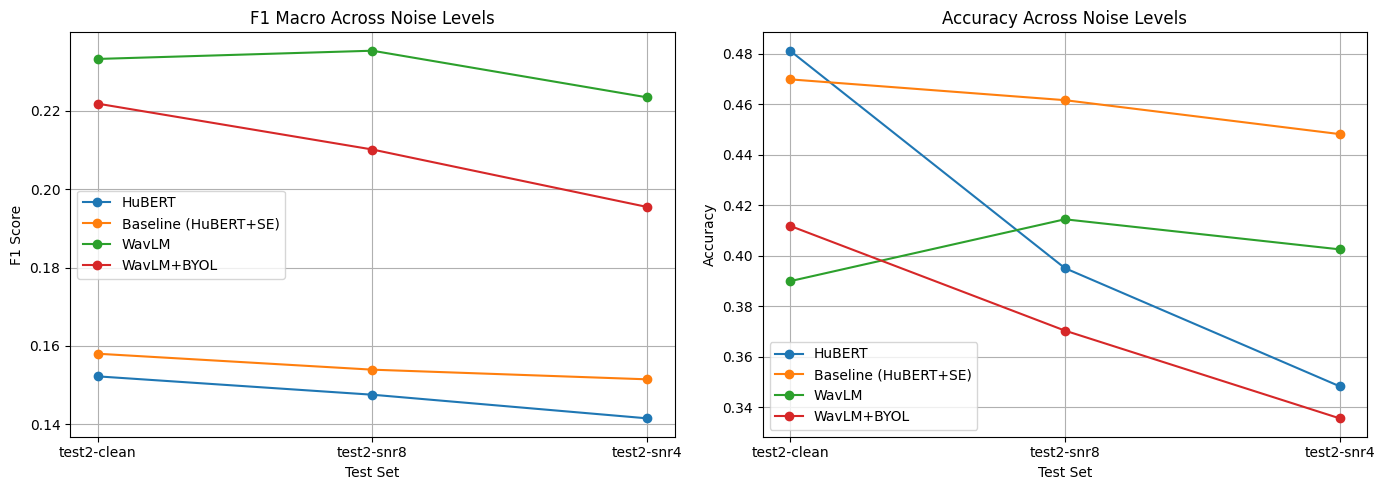

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "Model": ["HuBERT", "Baseline (HuBERT+SE)", "WavLM", "WavLM+BYOL"],
    "Variant": ["", "", "", ""],
    "F1_test2-clean": [0.152237, 0.158013, 0.2332, 0.2218],
    "F1_test2-snr8": [0.147555, 0.153945, 0.2353, 0.2101],
    "F1_test2-snr4": [0.14153, 0.151481, 0.2234, 0.19544],
    "ACC_test2-clean": [0.481134, 0.469794, 0.3899, 0.4118],
    "ACC_test2-snr8": [0.395073, 0.461559, 0.4144, 0.37034],
    "ACC_test2-snr4": [0.348296, 0.448127, 0.4025, 0.3356]
}

# Load into DataFrame
df = pd.DataFrame(data)

# Define SNR test sets
snr_levels = ["test2-clean", "test2-snr8", "test2-snr4"]

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# F1 Macro
for i, row in df.iterrows():
    axs[0].plot(
        snr_levels,
        [row["F1_test2-clean"], row["F1_test2-snr8"], row["F1_test2-snr4"]],
        marker='o',
        label=f'{row["Model"]}\n{row["Variant"]}'.strip()
    )
axs[0].set_title("F1 Macro Across Noise Levels")
axs[0].set_ylabel("F1 Score")
axs[0].set_xlabel("Test Set")
axs[0].legend()
axs[0].grid(True)

# Accuracy
for i, row in df.iterrows():
    axs[1].plot(
        snr_levels,
        [row["ACC_test2-clean"], row["ACC_test2-snr8"], row["ACC_test2-snr4"]],
        marker='o',
        label=f'{row["Model"]}\n{row["Variant"]}'.strip()
    )
axs[1].set_title("Accuracy Across Noise Levels")
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Test Set")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [9]:
!python baseline/convert_prediction_to_csv.py --input /proj/speech/users/syk2145/baseline/MSP-Podcast_Challenge/baseline/model/nrse_best_sim/2_best_sim/results/inference_results.csv --output inference_results/baseline/fine_tuned/emotion_predictions.csv

Converted file saved to inference_results/baseline/fine_tuned/emotion_predictions.csv


In [10]:
result_path = "inference_results/baseline/fine_tuned"
!python src/metrics/categorical_metrics.py \
  --predictions {result_path}/emotion_predictions.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {result_path}/metrics

Loading predictions from inference_results/baseline/fine_tuned/emotion_predictions.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 11411 matched samples out of 11411 predictions
Total samples before filtering: 11411
Total samples after filtering out X and O: 11411
Accuracy: 0.3412
Macro F1: 0.1288
Weighted F1: 0.3749
Classification report saved to inference_results/baseline/fine_tuned/metrics/classification_report.csv
Confusion matrix saved to inference_results/baseline/fine_tuned/metrics/confusion_matrix.png
F1 score plot saved to inference_results/baseline/fine_tuned/metrics/f1_by_class.png
Summary metrics saved to inference_results/baseline/fine_tuned/metrics/summary_metrics.csv

Class distribution in evaluation set:
Surprise: 553 samples (4.85%)
Happiness: 2566 samples (22.49%)
Contempt: 374 samples (3.28%)
Disgust: 186 samples (1.63%)
Anger: 437 samples (3.83%)
Fea

In [12]:
!python baseline/convert_prediction_to_csv.py --input /proj/speech/users/syk2145/baseline/MSP-Podcast_Challenge/baseline/model/nrse_best_sim/9/all/inference_results.csv --output inference_results/baseline/fine_tuned/emotion_predictions_all.csv

Converted file saved to inference_results/baseline/fine_tuned/emotion_predictions_all.csv


In [13]:
result_path = "inference_results/baseline/fine_tuned"
!python src/metrics/categorical_metrics.py \
  --predictions {result_path}/emotion_predictions_all.csv \
  --ground_truth /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv \
  --output_dir {result_path}/metrics_all

Loading predictions from inference_results/baseline/fine_tuned/emotion_predictions_all.csv
Loading ground truth from /proj/speech/projects/noise_robustness/MSP-PODCAST-Publish-1.11/Labels/labels_consensus.csv
Merging predictions with ground truth
Found 34181 matched samples out of 34181 predictions
Total samples before filtering: 34181
Total samples after filtering out X and O: 34181
Accuracy: 0.2718
Macro F1: 0.1351
Weighted F1: 0.3306
Classification report saved to inference_results/baseline/fine_tuned/metrics_all/classification_report.csv
Confusion matrix saved to inference_results/baseline/fine_tuned/metrics_all/confusion_matrix.png
F1 score plot saved to inference_results/baseline/fine_tuned/metrics_all/f1_by_class.png
Summary metrics saved to inference_results/baseline/fine_tuned/metrics_all/summary_metrics.csv

Class distribution in evaluation set:
Anger: 1307 samples (3.82%)
Surprise: 1656 samples (4.84%)
Sadness: 1433 samples (4.19%)
Fear: 553 samples (1.62%)
Disgust: 558 samp